In [56]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
#from sklearn.datasets.samples_generator import make_blobs
from itertools import cycle
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

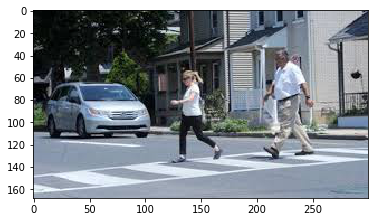

In [57]:
image = Image.open('../img_data/1.jpg')

# Image is (687 x 1025, RGB channels)
image = np.array(image)
original_shape = image.shape

# Flatten image.
X = np.reshape(image, [-1, 3])

plt.imshow(image)

In [58]:
#Estimate the kernel bandwidth to use from our image (the datapoints).
bandwidth = estimate_bandwidth(X, quantile=0.1, n_samples=100)
print(bandwidth)

22.854644788645793


In [59]:
# Execute Mean Shift Clustering
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)

MeanShift(bandwidth=22.854644788645793, bin_seeding=True, cluster_all=True,
          max_iter=300, min_bin_freq=1, n_jobs=None, seeds=None)

In [60]:
# Print information to help in possible debugging
labels = ms.labels_
print(labels.shape)
cluster_centers = ms.cluster_centers_
print(cluster_centers.shape)

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

(50400,)
(7, 3)
number of estimated clusters : 7


In [61]:
# Generate segmented image
segmented_image = np.reshape(labels, original_shape[:2])  # Just take size, ignore RGB channels.

(-0.5, 299.5, 167.5, -0.5)

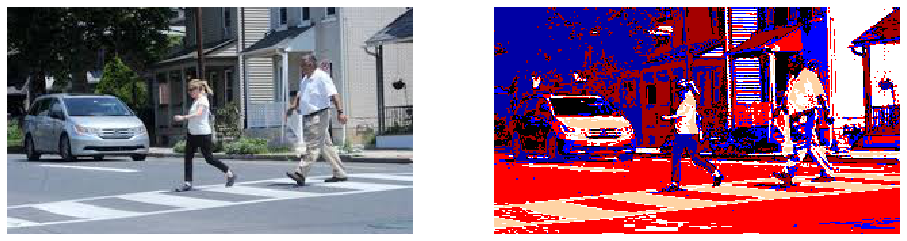

In [62]:
# Plot original and segmented image
plt.figure(2,figsize=(16,16))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(segmented_image, cmap = 'flag')
plt.axis('off')